# Assignment - 04


# Simple linear regression

question no 1

finding delivery time using sorting time.

lets assume our target accuracy that is our r_square value as 75%

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deli=pd.read_csv('delivery_time.csv')
deli

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
deli.shape

(21, 2)

In [4]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
deli.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
deli.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [7]:
deli=deli.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
deli

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


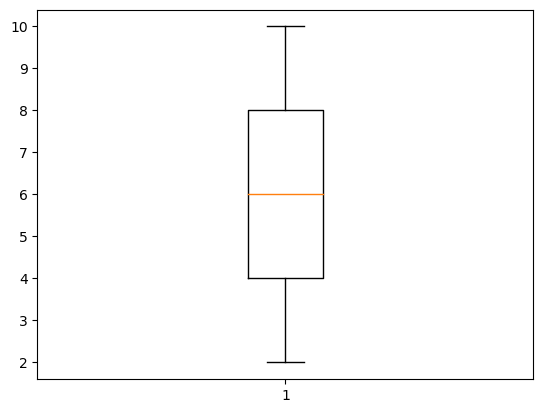

In [8]:
plt.boxplot(deli.sorting_time)
plt.show()

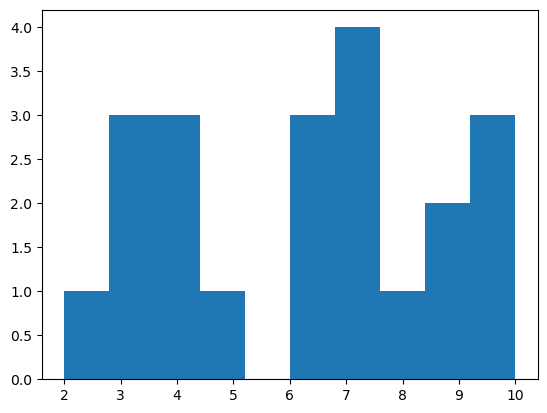

In [9]:
plt.hist(deli.sorting_time)
plt.show()

In [10]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

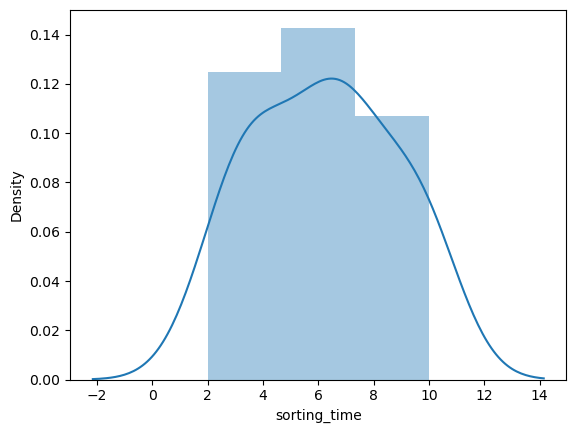

In [11]:
sns.distplot(deli['sorting_time'])

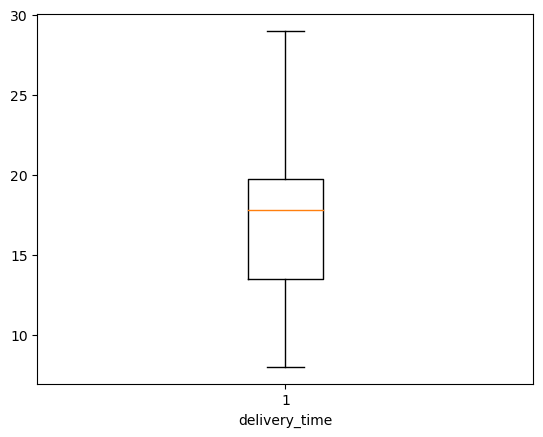

In [12]:
plt.boxplot(deli.delivery_time)
plt.xlabel('delivery_time')
plt.show()

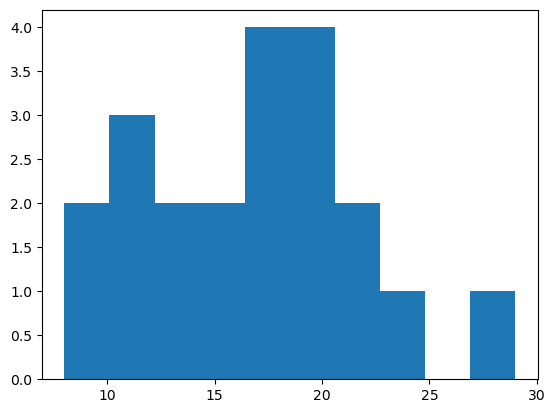

In [13]:
plt.hist(deli.delivery_time)
plt.show()

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

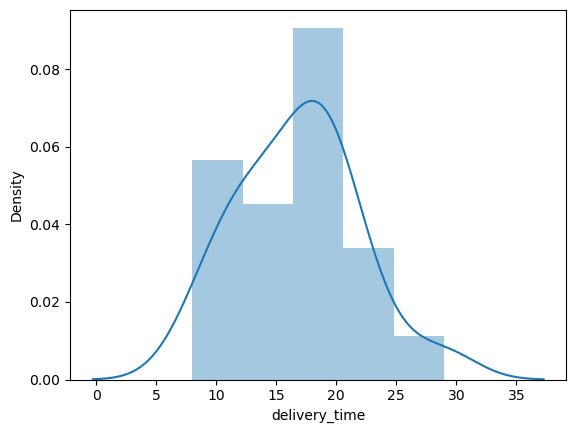

In [14]:
sns.distplot(deli['delivery_time'])

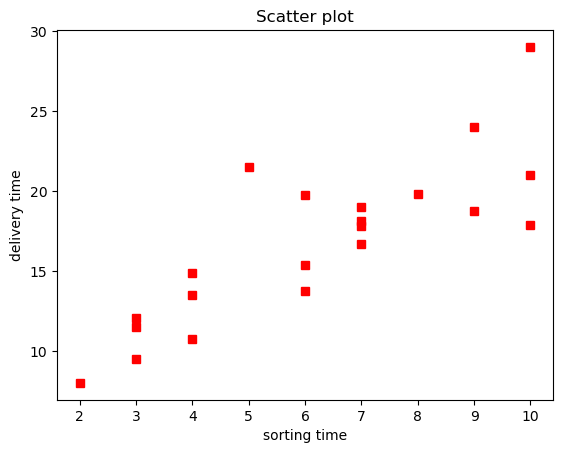

In [15]:
plt.plot(deli.sorting_time,deli.delivery_time,'rs')
plt.xlabel('sorting time')
plt.ylabel('delivery time')
plt.title('Scatter plot')
plt.show()

# corelation testing

In [16]:
deli.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


delivery time and sorting time are strongly co related.

# model building and testing 

In [17]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time~sorting_time',data=deli).fit()
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           3.98e-06
Time:                        14:48:09   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

our R-sqare value is 0.68
p value is 0.000 so that our sorting time is significant 
beta(0) is 6.58 and beta(1) is 1.649

In [19]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [20]:
pred=model.predict(deli.sorting_time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [21]:
#root mean square value of errors
rmse_lin = np.sqrt(np.mean((np.array(deli['delivery_time'])-np.array(pred))**2))
rmse_lin

2.7916503270617654

Text(0, 0.5, 'delivery time')

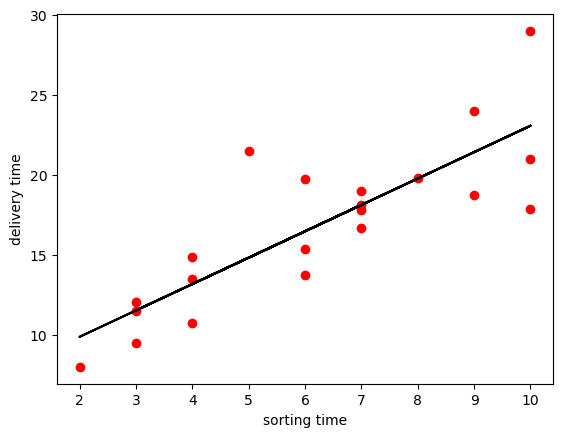

In [22]:
plt.scatter(x=deli['sorting_time'],y=deli['delivery_time'],color='red')
plt.plot(deli['sorting_time'],pred,color='black')
plt.xlabel('sorting time')
plt.ylabel('delivery time') 

to achieve assumed accuracy , i am going to build another model using combination of logarithmic and logarithmic functions


# model 2

In [23]:
import statsmodels.formula.api as smf
model2 = smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=deli).fit()

In [24]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 01 Jan 2023   Prob (F-statistic):           1.60e-07
Time:                           14:48:09   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As our R square value is 0.772 that is 77.2% we achieved our assumed accuracy

the p value for sorting time  is less than 0.05  it is  significant.

beta(0)=1.742  beta(1)=0.5975 beta 

In [25]:
model2.resid

0    -0.073311
1     0.032361
2     0.170550
3     0.123176
4     0.249463
5    -0.081488
6     0.039727
7    -0.147141
8    -0.233032
9    -0.123684
10    0.002696
11   -0.195423
12   -0.090501
13    0.043915
14    0.088971
15    0.129689
16   -0.191565
17   -0.008248
18   -0.076716
19   -0.023829
20    0.364391
dtype: float64

In [26]:
model2.resid_pearson

array([-0.47042351,  0.20765416,  1.09439452,  0.79040191,  1.600765  ,
       -0.52289568,  0.25492302, -0.94417959, -1.49533389, -0.79366223,
        0.01730048, -1.2540012 , -0.58073428,  0.28179324,  0.57091402,
        0.83219556, -1.22924105, -0.05292349, -0.49227806, -0.15290982,
        2.3382409 ])

In [27]:
pred2 = model2.predict(pd.DataFrame(deli['sorting_time'])) 
pred2=np.exp(pred2)
pred2

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

In [28]:
pred2
rmse_log = np.sqrt(np.mean((np.array(deli['delivery_time'])-np.array(pred2))**2))
rmse_log 

2.7458288976145493

In [29]:
pred2.corr(deli.delivery_time)

0.8331464716437292

Text(0, 0.5, 'delivery time')

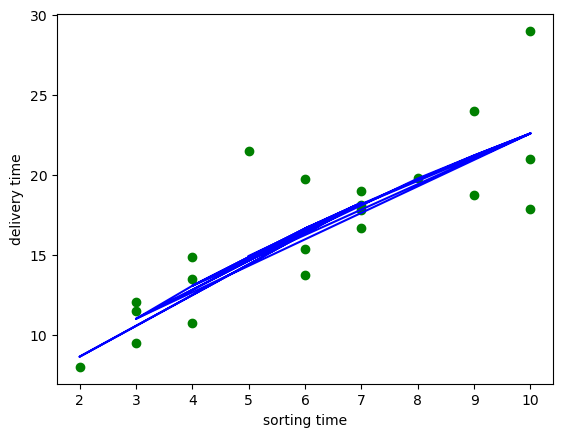

In [30]:
plt.scatter(x=deli['sorting_time'],y=deli['delivery_time'],color='green')
plt.plot(deli['sorting_time'],pred2,color='blue')
plt.xlabel('sorting time')
plt.ylabel('delivery time') 

# Model Validation

Text(0, 0.5, 'Standardized Residual')

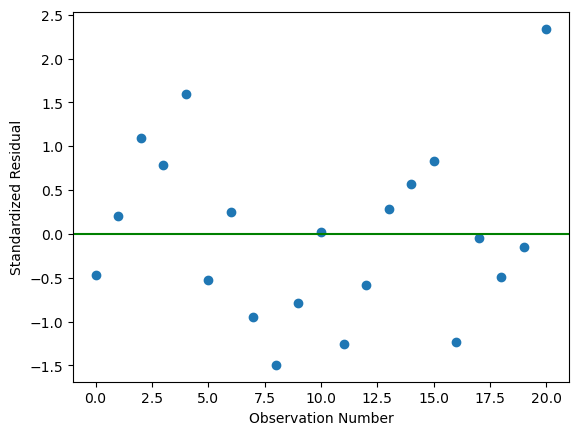

In [65]:
plt.plot(model2.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 

The std residuals have mean value 0 and its constant variance from mean so i can say that the model2 is valid one.

In [32]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.745829,0.772161


# Predicting delivery time using sorting time by using new Model

In [40]:
# taking sorting time 15 and 20 just to predict for these values
new_data=pd.Series([15,20])
data_pred=pd.DataFrame(new_data,columns=["sorting_time"])
model2.predict(np.exp(data_pred))

0    10.704822
1    13.692434
dtype: float64

In [38]:
np.exp([3.360108,3.532004])

array([28.79230028, 34.19242061])

The delivery time for 15 and 20 is 28.79 and 34.19 respectively

# Question 2

Predicting salary hike using years of experiance

In [41]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [42]:
sal=pd.read_csv('Salary_Data.csv')
sal

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [43]:
sal.shape

(30, 2)

In [44]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [46]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<function matplotlib.pyplot.show(close=None, block=None)>

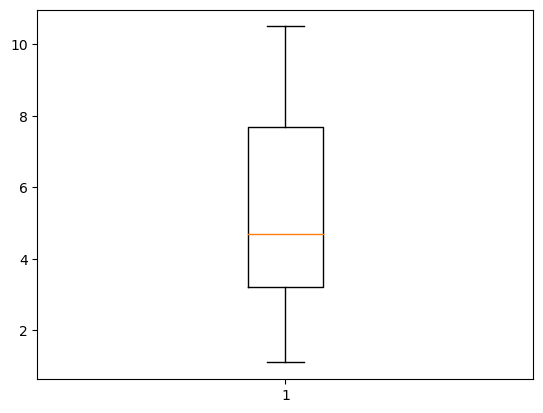

In [47]:
plt.boxplot(sal.YearsExperience)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

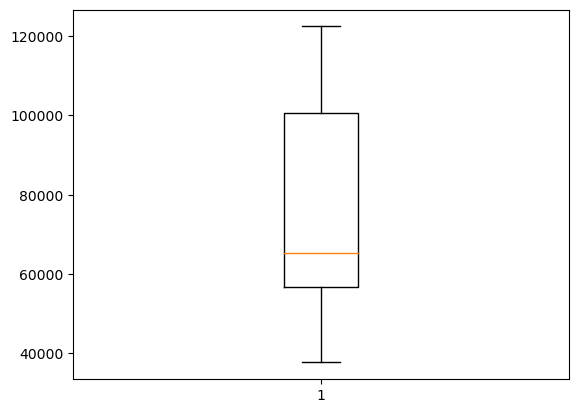

In [48]:
plt.boxplot(sal.Salary)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

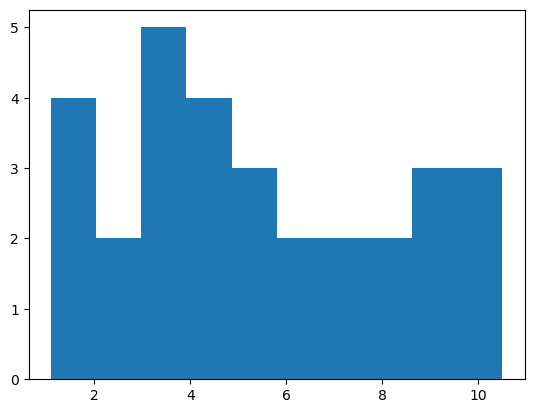

In [50]:
plt.hist(sal.YearsExperience)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

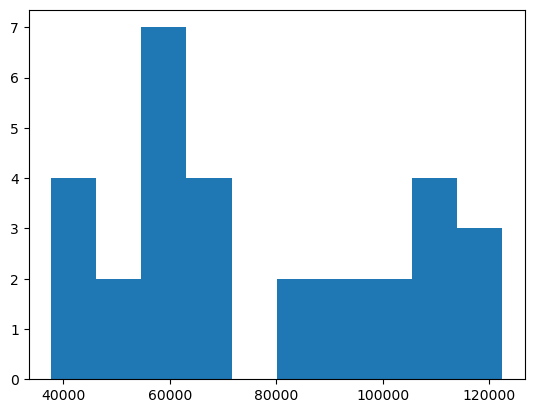

In [51]:
plt.hist(sal.Salary)
plt.show

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

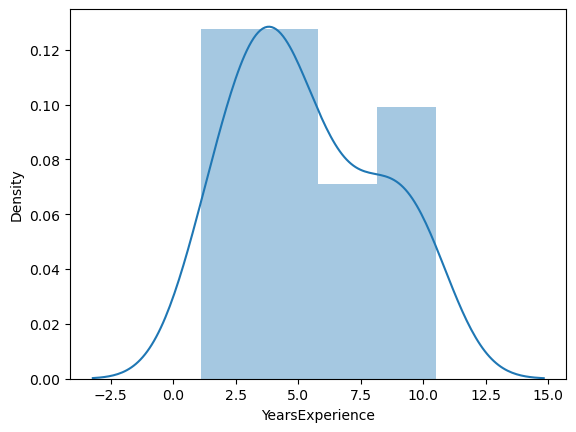

In [52]:
sns.distplot(sal.YearsExperience)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

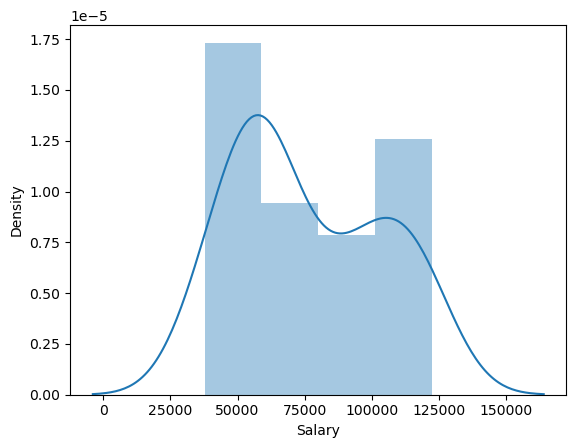

In [53]:
sns.distplot(sal.Salary)

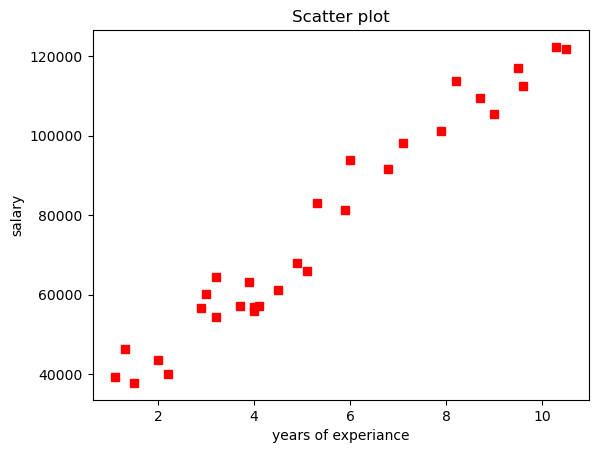

In [55]:
plt.plot(sal.YearsExperience,sal.Salary,'rs')
plt.xlabel('years of experiance')
plt.ylabel('salary')
plt.title('Scatter plot')
plt.show()

In [56]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


our data is very strongly corelated 

# Model building and testing

In [57]:
salmodel=smf.ols("Salary~YearsExperience",data=sal).fit()

In [58]:
salmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        15:24:37   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As R square value is 0.955 that is our model has 95.5% accuracy and no need to do transformations as it already has high accuracy.

P value for Years of experience is less than 0.05 so that it is significant

beta(0)=2.579e+04        beta(1)=9449.9623

In [59]:
salmodel.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [60]:
salmodel.resid_pearson

array([ 0.54520896,  1.40418217, -0.38632031, -0.20163464, -1.15596979,
        0.59514885,  1.03793812, -0.27418681,  1.45343166, -0.61642477,
        0.09863781, -1.34720543, -1.1462834 , -1.28812023, -1.24492716,
       -0.71851921, -1.37484017,  1.24578559, -0.03178436,  1.9777821 ,
        0.29128615,  0.93050694,  0.14772822,  1.81920104,  0.24603492,
       -0.90870332,  0.24223936, -0.66976978, -0.12712026, -0.54330225])

In [61]:
predd=salmodel.predict(pd.DataFrame(sal['YearsExperience']))
predd

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [62]:
predd
rmse1 = np.sqrt(np.mean((np.array(sal['Salary'])-np.array(predd))**2))
rmse1

5592.043608760662

root mean square of errors value is 5592.04

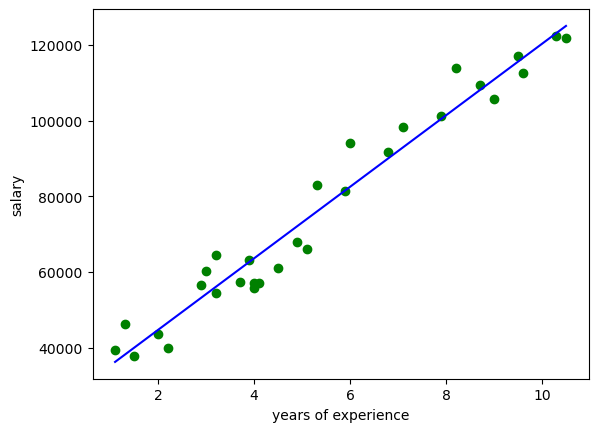

In [64]:
plt.scatter(x=sal['YearsExperience'],y=sal['Salary'],color='green')
plt.plot(sal['YearsExperience'],predd,color='blue')
plt.xlabel('years of experience')
plt.ylabel('salary')
plt.show()

# Model validation

Text(0, 0.5, 'Standardized Residual')

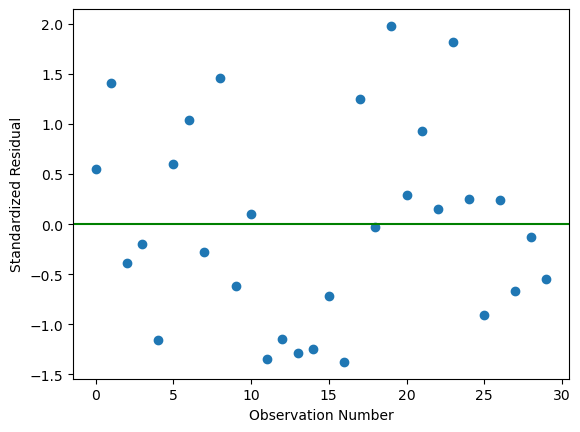

In [66]:
plt.plot(salmodel.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 

 The std residual values has mean 0 and they have constant variance from mean hence our model is valid

# Predicting salary using years of experience

In [67]:
new_data1=pd.Series([12,16])
data_pred1=pd.DataFrame(new_data1,columns=["YearsExperience"])
salmodel.predict(data_pred1)

0    139191.748056
1    176991.597342
dtype: float64

For our input of 12 and 16 years of experience the salary is 139191.74 and 176991.597 respectively.